In [1]:
from gensim import corpora
from parameters import *
from NLP_preprocessing import *
from LDA_model import *
from utils import read_data

import warnings
warnings.filterwarnings('ignore')


#read dataset, only keep desired text column and rename it
data = read_data(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE)
cleaned_text = process_text_col(data, text_col = RENAMED_TEXT_COL)  # processed Text Data

# Create Dictionary
id2word = corpora.Dictionary(cleaned_text)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in cleaned_text]

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [16:21<00:00, 57.71s/it]


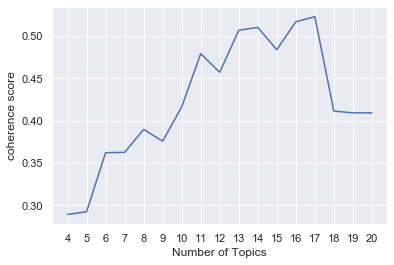

In [2]:
# coherence_vs_topics(texts= cleaned_text,corpus = corpus, dictionary = id2word ,min_number_topics = 4, max_number_topics = 20)

# from IPython.display import Image
# Image('out/coherence_Topics_plot.png')

In [2]:
NUM_TOPICS = 11
lda_model = lda(num_topics = NUM_TOPICS, corpus = corpus , dictionary = id2word)


In [3]:
#11 topics
pd.set_option('display.max_colwidth', 100)
df_dominant_topic = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=cleaned_text)
# df_dominant_topic.head()

df_dominant_topic.Dominant_Topic.value_counts()

5.0     2077
8.0      602
3.0      484
10.0     416
0.0      410
6.0      170
1.0        5
2.0        3
4.0        1
9.0        1
Name: Dominant_Topic, dtype: int64

In [4]:
df_dominant_topic[round(df_dominant_topic.Topic_Perc_Contrib,4) == round(1/NUM_TOPICS, 4)]

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
129,1.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[hate]
159,2.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[ready]
843,0.0,0.0909,"update, payment, pay, credit, able, want, answer, help, complete, dec",[]
1090,2.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[2017return]
1303,0.0,0.0909,"update, payment, pay, credit, able, want, answer, help, complete, dec",[]
1481,9.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[server_error]
1482,1.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[undated]
1843,0.0,0.0909,"update, payment, pay, credit, able, want, answer, help, complete, dec",[]
2089,0.0,0.0909,"update, payment, pay, credit, able, want, answer, help, complete, dec",[]
2192,4.0,0.0909,"mind, misspelling, tardy, prefer, arrange, clarification, meet, mac, repeat, winnipeg",[applicable]


In [5]:
# df_dominant_topic[round(df_dominant_topic.Topic_Perc_Contrib,4) < 0.18]

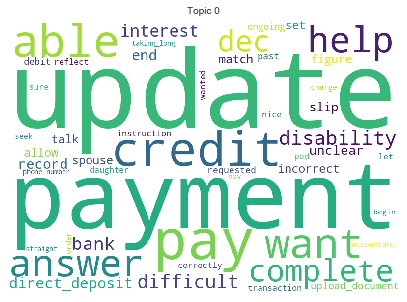

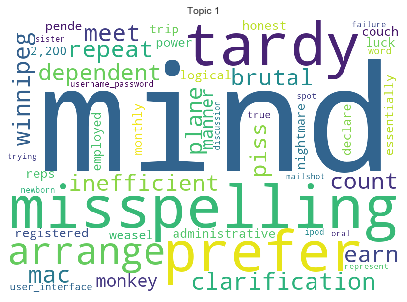

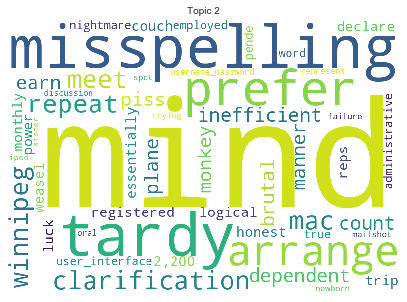

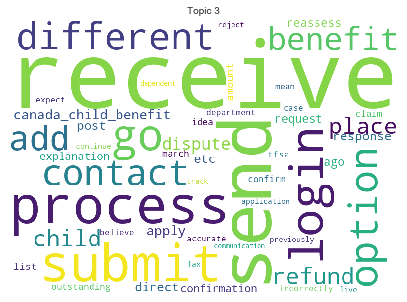

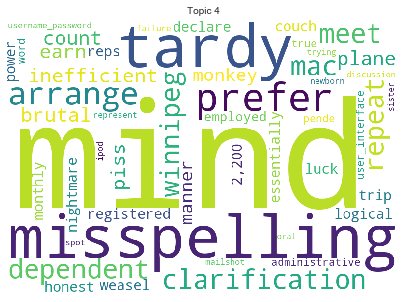

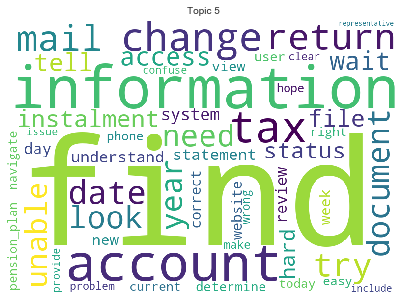

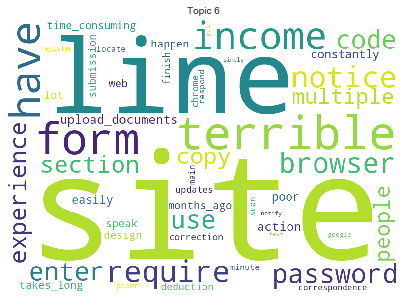

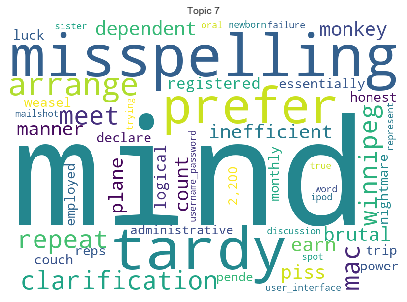

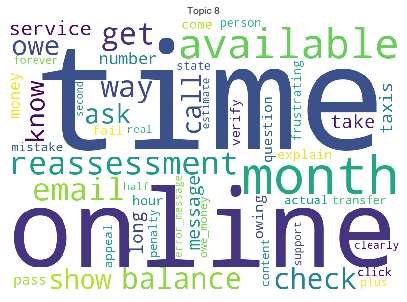

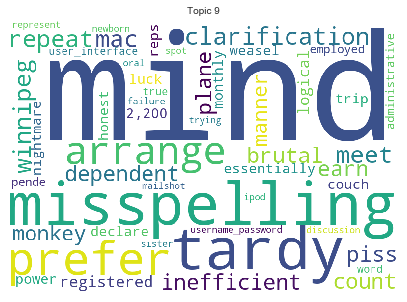

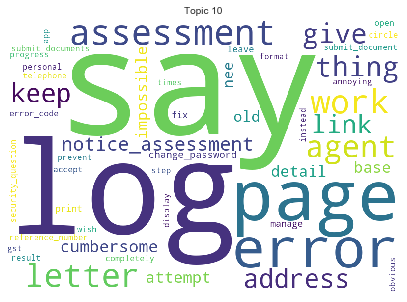

In [6]:
#Wordcloud 
get_wordcloud_LDA(ldamodel = lda_model, num_topics = NUM_TOPICS)

In [8]:
# word_count_topic(ldamodel = lda_model, num_topics = NUM_TOPICS , texts = cleaned_text)

In [7]:
# sentences_chart(ldamodel=lda_model, corpus=corpus, start = 0, end = 14)   

In [10]:
# Plot_topic_dist(ldamodel= lda_model, num_topics = NUM_TOPICS, corpus = corpus)

In [11]:
# tsne_plot(ldamodel = lda_model, corpus = corpus,num_topics = NUM_TOPICS , Keep_well_separated_pcnt = 0.35)

In [12]:
# pyldavis_plot(ldamodel = lda_model ,corpus = corpus,  mds = "tsne")

In [8]:
def top3_topics_per_document(ldamodel, corpus):
    topics_top3 = []

    for i, corp in enumerate(corpus):
        topic_percs, wordid_topics, wordid_phivalues = ldamodel[corp]
        dominant_topic = sorted(topic_percs, key=lambda x: x[1], reverse=True)[0][0]
        try:
            topic2 = sorted(topic_percs, key=lambda x: x[1], reverse=True)[1][0]
        except:
            topic2 = None        
        try:
            topic3 = sorted(topic_percs, key=lambda x: x[1], reverse=True)[2][0]
        except:
            topic3 = None
        topics_top3.append((i, dominant_topic , topic2, topic3 ))       


    df = pd.DataFrame(topics_top3, columns = ['Document_Id', 'Dominant_Topic', 'Second_Topic', 'Third_Topic'])
    
    return df

In [9]:
top3_topics = top3_topics_per_document(ldamodel = lda_model, corpus = corpus)

In [15]:
len(top3_topics)

4169

In [16]:
len(data)

4169

In [10]:
cols = ['Quarter','Submitted date','What was the main purpose of your visit today? Please choose one option only. The list represents broad categories, and you may be asked to further specify the main reason why you visited today.','Approximately how often do you visit My Account?',
 "Overall how satisfied were you with today's experience?", 'Which option did you choose to login to My Account?', 'Did/do you need to call the CRA to complete your visit/transaction today?',
 'Are you:', 'I live in...' ,
 'What is the highest level of education you have completed?', 'Would you be willing to indicate in which of the following age categories you belong?',
'What language do you speak most often at home?', 'Which of the following categories best describes your current employment status?', 'Which of the following categories best represents your most recent annual household income, before taxes?', 
'Are you an Aboriginal person?', 'Are you a person with a disability?', 'Are you a member of a visible minority group?', 'From what type of device did you access My Account today?']

def read_data_cols(in_dir, filename, text_col, renamed_text_col, text_language = 'EN' , other_cols = cols):
    assert len(renamed_text_col) > 0
    df = pd.read_csv(os.path.join(in_dir, filename))
    df.rename(columns={text_col: renamed_text_col}, inplace=True)
    columns = [renamed_text_col] + cols
    if text_language == 'EN':
        # filter english only and not null rows
        df = df.loc[(~df[renamed_text_col].isna()) & (df['Language answered'] == 'EN'),
                    columns]
#     elif text_language == 'FR':
#         df = df.loc[(~df[renamed_text_col].isna()) & (df['Language answered'] == 'FR'),
#                     [renamed_text_col]]
#     elif text_language == 'ALL':
#         df = df.loc[~df[renamed_text_col].isna(), [renamed_text_col]]

    else:
        raise ValueError

    df = df.reset_index()

    return df

In [11]:
org_data = read_data_cols(in_dir = IN_DIR, filename = FILENAME, text_col = TEXT_COL , 
                 renamed_text_col = RENAMED_TEXT_COL, text_language = LANGUAGE , other_cols = cols)

In [19]:
org_data.shape

(4169, 20)

In [12]:
merged = pd.concat([org_data, df_dominant_topic, top3_topics.loc[:, [ 'Second_Topic', 'Third_Topic']]], axis=1 , ignore_index = False)
merged.head()

,index,dissatisfaction_reason,Quarter,Submitted date,"What was the main purpose of your visit today? Please choose one option only. The list represents broad categories, and you may be asked to further specify the main reason why you visited today.",Approximately how often do you visit My Account?,Overall how satisfied were you with today's experience?,Which option did you choose to login to My Account?,Did/do you need to call the CRA to complete your visit/transaction today?,Are you:,...,Are you an Aboriginal person?,Are you a person with a disability?,Are you a member of a visible minority group?,From what type of device did you access My Account today?,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Second_Topic,Third_Topic
0,17,couldn't find my gst assessment it logged me out/timed out during setup/printed a blank page/sa...,Q4,1/4/2018,"Proof of income statement (option ""C"" print)",This was my first visit,Very dissatisfied,CRA user ID and password,Yes,Male,...,No,Yes,No,Desktop or laptop computer,10.0,0.6840,"say, log, page, error, assessment, work, letter, agent, thing, give","[find, gst, assessment, log, time, setup, print, blank, page, say, page, print, print, page, bla...",8,5.0
1,36,more dissatisfied by the cra and the time table for my reassesment of my 2016 taxes,Q4,1/4/2018,Tax returns,Once per month or more,Very dissatisfied,NaN,Yes,Male,...,No,No,No,Desktop or laptop computer,8.0,0.8188,"time, online, month, available, reassessment, email, get, way, balance, check","[dissatisfied, time, table, reassessment, taxis]",0,1.0
2,56,"This site is not user friendly at all, specially for people, who are not accustomed to the use o...",Q4,1/5/2018,Tax returns,Once per month or more,Somewhat dissatisfied,NaN,No,Male,...,No,Prefer not to say,Yes,Desktop or laptop computer,6.0,0.5186,"site, line, terrible, form, have, income, require, notice, browser, password","[site, user_friendly, specially, people, accustomed, use, computer]",5,10.0
3,58,The option to login on the canada.ca site feels hidden,Q4,1/5/2018,Online mail,Once or twice per year,Somewhat dissatisfied,NaN,No,Male,...,No,No,No,Smartphone,3.0,0.2989,"receive, send, process, submit, login, go, option, different, contact, add","[option, login, canada, site, feel, hide]",5,6.0
4,72,"could not access my spouse (my wife account) yet I am her representative, We are living in Czech...",Q4,1/5/2018,Tax returns,Once every 2 to 3 months,Very dissatisfied,NaN,No,Male,...,No,Yes,No,Desktop or laptop computer,5.0,0.6769,"find, information, account, tax, change, return, mail, try, date, look","[access, spouse, wife, account, representative, living, czech, republic, easy, reach, phone, exp...",0,8.0


In [21]:
merged.shape

(4169, 26)

In [22]:
# merged.to_csv('df_with_topics_dissatisfaction_reason_jun14.csv')

In [13]:
merged.loc[merged['Dominant_Topic'] == 0 , ['Topic_Perc_Contrib','dissatisfaction_reason']].sort_values(by=['Topic_Perc_Contrib'] , ascending=False).head(10)

,Topic_Perc_Contrib,dissatisfaction_reason
112,0.7647,TFSA contribution room is not reflecting 2017 transactions
327,0.6987,I was sure I made a TFSA contribution in 2017 but I see no record of it?
571,0.6970,It's very difficult to get help from someone at the CRA.
933,0.6970,I can never get an update answer
3500,0.6968,I could not accomplish what I intended to do
2807,0.6862,I could not do what I wanted to due to technical difficulties
30,0.6818,Taking to long to update disability tax credit
2586,0.6818,I was not able to accomplish my task for pre-authorized payment
63,0.6818,can't figure out why i have a debit on a credit i was just paid last week
194,0.6802,TFSA contribution room wasn't updated


In [15]:
for i in range(11):
    print(f'Some examples for topic {i}')
    print('')
    
    samples = merged.loc[merged['Dominant_Topic'] == i , ['Topic_Perc_Contrib','dissatisfaction_reason']].sort_values(by=['Topic_Perc_Contrib'] , ascending=False).head(20)
    print(samples['dissatisfaction_reason'].values)
    print(" ****************")
    


Some examples for topic 0

['TFSA contribution room is not reflecting 2017 transactions'
 'I was sure I made a TFSA contribution in 2017 but I see no record of it?'
 "It's very difficult to get help from someone at the CRA."
 'I can never get an update answer'
 'I could not accomplish what I intended to do'
 'I could not do what I wanted to due to technical difficulties'
 'Taking to long to update disability tax credit'
 'I was not able to accomplish my task for pre-authorized payment'
 "can't figure out why i have a debit on a credit i was just paid last week"
 "TFSA contribution room wasn't updated"
 'Direct debit payment made yesterday, but not yet acknowledged'
 "I wanted to print the original slip from employers but i couldn't"
 "Reassessment rec'd Dec 19 and due Jan 2, Earliest possible PAD date was Dec 28, only a few days before due.  Had to drive to bank to pay it today."
 'CRA reps  cannot  explain their own comments, CRA is power tripping again; cannot get a straight and hone